## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Loading the dataset

In [ ]:
zomato = pd.read_csv("/content/zomato.csv")
zomato.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

## Dataset Information

In [ ]:
print('Dataset Information')
zomato.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_lis

## Checking for Missing values

In [ ]:
print('Checking for Missing values')
zomato.isnull().sum()

Checking for Missing values


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Removing Missing Values

In [ ]:
zomato_cleaned = zomato.dropna()

## After Checking Missing Values

In [ ]:
print(zomato_cleaned.isnull().sum())

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [ ]:
zomato_cleaned.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

## Descriptive Statistics

In [ ]:
print('Descriptive Statistics')
zomato.describe()

Descriptive Statistics


votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

## Visualisation

### Distribution of Top 10 Restaurant Ratings (Rate)

<ipython-input-88-ba2c2ee93264>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rate', data=top_ratings_data, palette='Set2')


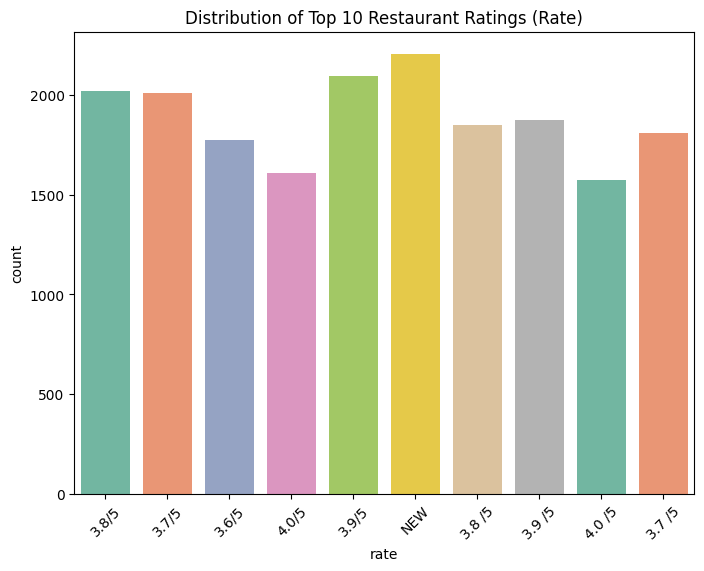

In [ ]:
top_ratings = zomato['rate'].value_counts().head(10).index

top_ratings_data = zomato[zomato['rate'].isin(top_ratings)]

plt.figure(figsize=(8, 6))

sns.countplot(x='rate', data=top_ratings_data, palette='Set2')

plt.title('Distribution of Top 10 Restaurant Ratings (Rate)')
plt.xticks(rotation=45)

plt.show()

### Distribution of Approximate Cost for Two People

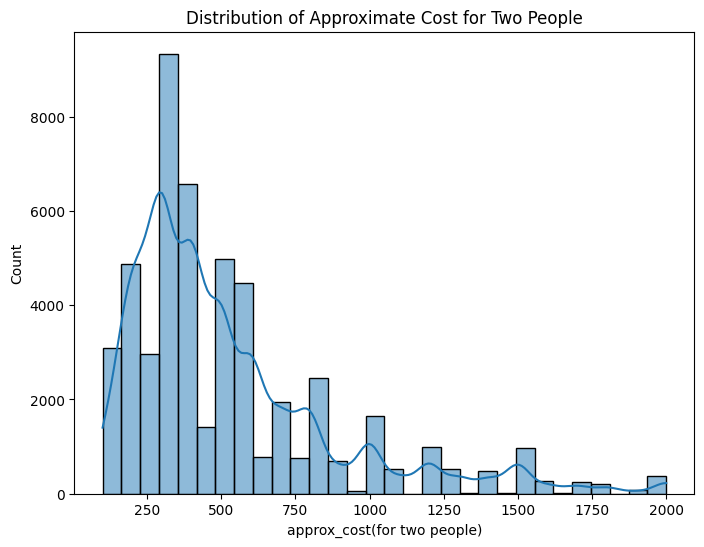

In [ ]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].replace({'\,': '', '₹': ''}, regex=True).astype(float)

filtered_data = zomato[zomato['approx_cost(for two people)'] <= 2000]
filtered_data = filtered_data[filtered_data['approx_cost(for two people)'] >= 100]

plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['approx_cost(for two people)'], kde=True, bins=30)
plt.title('Distribution of Approximate Cost for Two People')
plt.show()

### Top 10 Restaurants by Total Votes

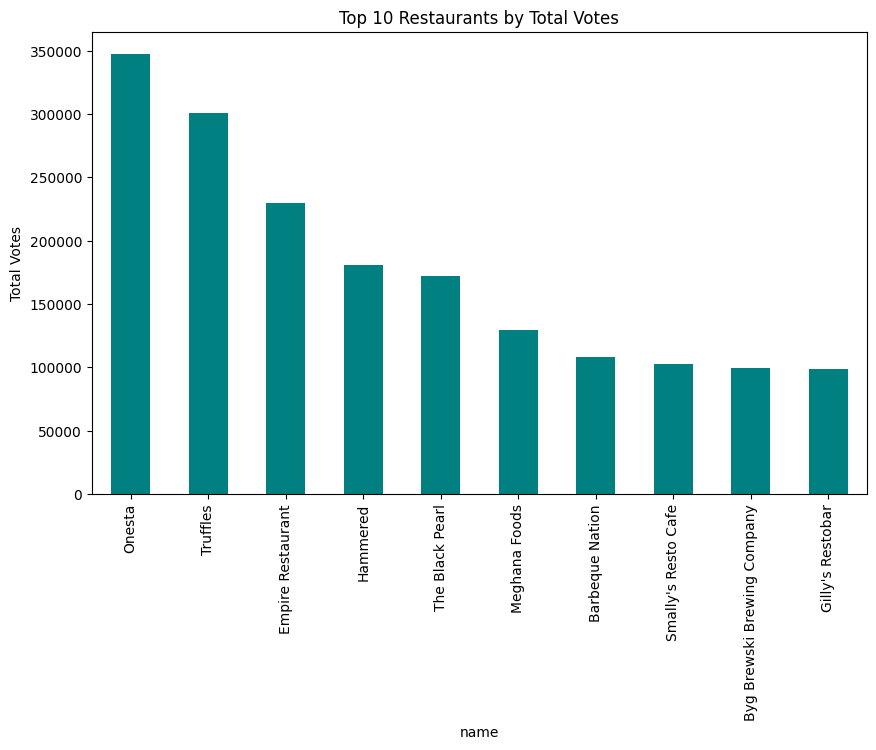

In [ ]:
top_10_votes = zomato.groupby('name')['votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_votes.plot(kind='bar', color='teal')
plt.title('Top 10 Restaurants by Total Votes')
plt.xticks(rotation=90)
plt.ylabel('Total Votes')
plt.show()

### Distribution of Restaurants Offering Online Order

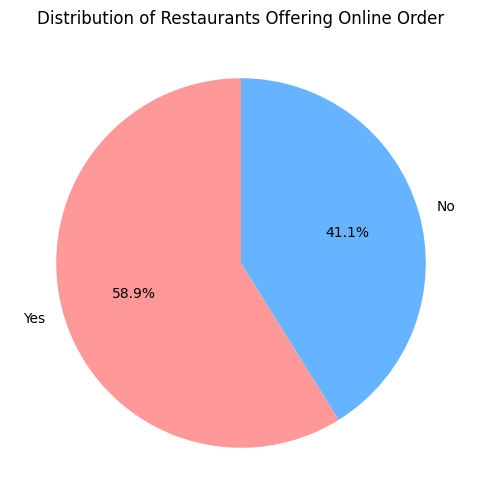

In [ ]:
online_order_count = zomato['online_order'].value_counts()
plt.figure(figsize=(8, 6))
online_order_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Restaurants Offering Online Order')
plt.ylabel('')
plt.show()

### Correlation Matrix

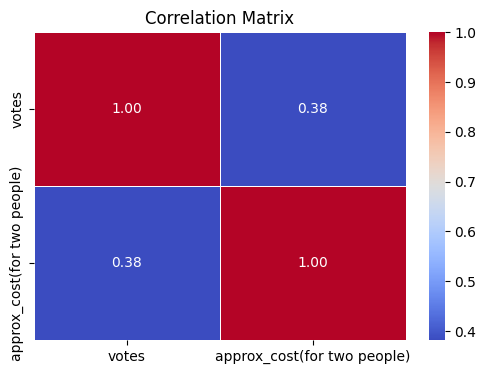

In [ ]:
selected_columns = zomato[['votes', 'approx_cost(for two people)']]

corr_matrix = selected_columns.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Classification Method Models

## Random Forest Classifier

In [ ]:
zomato_cleaned['rate'] = zomato_cleaned['rate'].apply(lambda x: str(x).replace('/5', '').strip() if isinstance(x, str) else x)

zomato_cleaned['rate'] = pd.to_numeric(zomato_cleaned['rate'], errors='coerce')

zomato_cleaned = zomato_cleaned.dropna(subset=['rate'])

bins = [0, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']
zomato_cleaned['rate_bins'] = pd.cut(zomato_cleaned['rate'], bins=bins, labels=labels, right=False)

label_encoder = LabelEncoder()
zomato_cleaned['rest_type'] = label_encoder.fit_transform(zomato_cleaned['rest_type'].fillna('Unknown'))

zomato_cleaned['approx_cost(for two people)'] = pd.to_numeric(
    zomato_cleaned['approx_cost(for two people)'], errors='coerce'
)

zomato_cleaned = zomato_cleaned.dropna(subset=['approx_cost(for two people)'])

features = ['votes', 'rest_type', 'approx_cost(for two people)']

X = zomato_cleaned[features]
X = X.fillna(X.median())

y = zomato_cleaned['rate_bins']
y = y.dropna()

if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    print("\nRandom Forest Classifier:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.8937536485697607
Classification Report:
              precision    recall  f1-score   support

         2-3       0.77      0.71      0.74       207
         3-4       0.90      0.91      0.91      1794
         4-5       0.90      0.90      0.90      1425

    accuracy                           0.89      3426
   macro avg       0.86      0.84      0.85      3426
weighted avg       0.89      0.89      0.89      3426



### Confusion Matrix for Random Forest Classifier

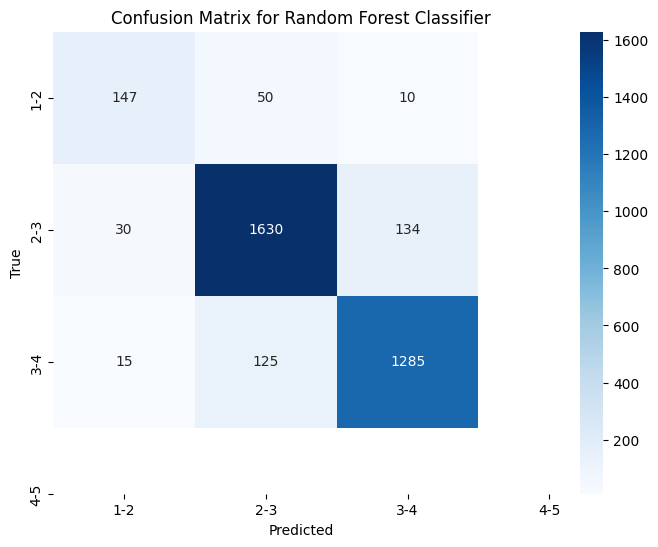

In [ ]:
if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_rf)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix for Random Forest Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Naive Bayes Classifier

In [ ]:
features = ['votes', 'rest_type', 'approx_cost(for two people)']

X = zomato_cleaned[features]
X = X.fillna(X.median())

y = zomato_cleaned['rate_bins']
y = y.dropna()

if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    print("Naive Bayes Classifier:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier:
Accuracy: 0.6199649737302977
Classification Report:
              precision    recall  f1-score   support

         2-3       0.00      0.00      0.00       207
         3-4       0.59      0.94      0.72      1794
         4-5       0.81      0.30      0.44      1425

    accuracy                           0.62      3426
   macro avg       0.46      0.42      0.39      3426
weighted avg       0.64      0.62      0.56      3426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix for Naive Bayes

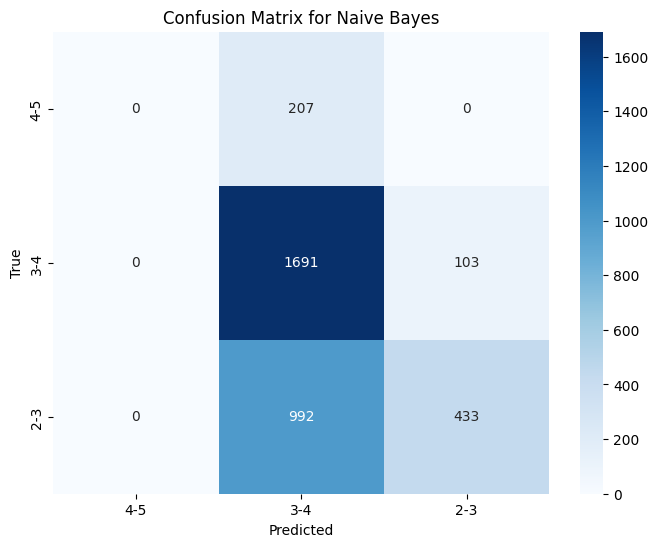

In [ ]:
if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_nb)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title('Confusion Matrix for Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Models Accuracy Comparison

<ipython-input-68-13414b7be639>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')


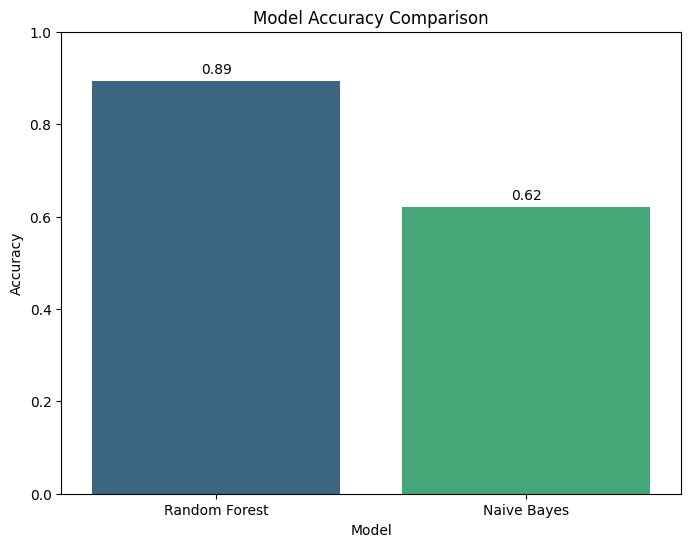

In [ ]:
if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)

    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, y_pred_nb)

    model_names = ['Random Forest', 'Naive Bayes']
    accuracies = [rf_accuracy, nb_accuracy]

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.ylim(0, 1)

    for i in range(len(accuracies)):
        ax.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')

    plt.show()

## Regression Method Models

### Linear Regession and K-Nearest Neighbour model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

if len(X) == 0 or len(y) == 0:
    print("No valid data available for training. Please check your dataset.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)

    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    lr_r2 = r2_score(y_test, y_pred_lr)
    lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    lr_mape = mean_absolute_percentage_error(y_test, y_pred_lr)

    print("Linear Regression Model:")
    print(f"R² Score: {lr_r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {lr_mape:.4f}")

    knn_r2 = r2_score(y_test, y_pred_knn)
    knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    knn_mape = mean_absolute_percentage_error(y_test, y_pred_knn)

    print("\nK-Nearest Neighbors Regression Model:")
    print(f"R² Score: {knn_r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {knn_rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {knn_mape:.4f}")


Linear Regression Model:
R² Score: 0.0862
Root Mean Squared Error (RMSE): 0.3998
Mean Absolute Percentage Error (MAPE): 0.0817

K-Nearest Neighbors Regression Model:
R² Score: 0.5388
Root Mean Squared Error (RMSE): 0.2840
Mean Absolute Percentage Error (MAPE): 0.0465


### Models R² Comparison

<ipython-input-94-e02db6572626>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=model_names, y=r2_scores, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-94-e02db6572626>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=model_names, y=rmse_scores, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-94-e02db6572626>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=model_names, y=mape_scores, palette=['#1f77b4', '#ff7f0e'])


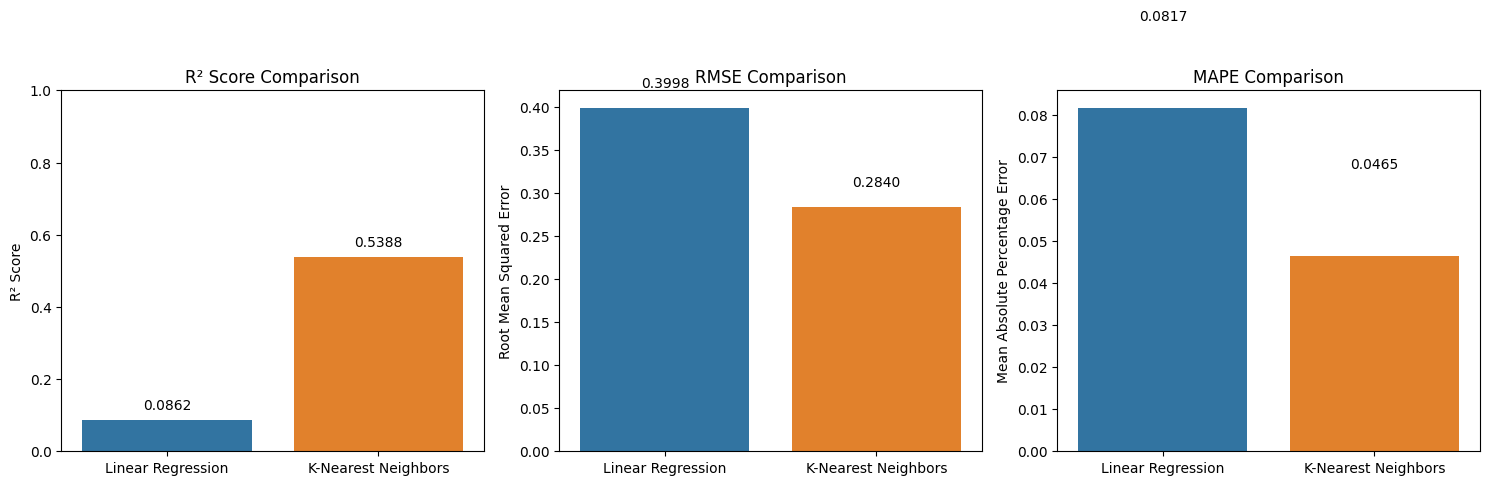

In [ ]:
model_names = ['Linear Regression', 'K-Nearest Neighbors']
r2_scores = [lr_r2, knn_r2]
rmse_scores = [lr_rmse, knn_rmse]
mape_scores = [lr_mape, knn_mape]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x=model_names, y=r2_scores, palette=['#1f77b4', '#ff7f0e'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x=model_names, y=rmse_scores, palette=['#1f77b4', '#ff7f0e'])
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
for i, v in enumerate(rmse_scores):
    ax2.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.subplot(1, 3, 3)
ax3 = sns.barplot(x=model_names, y=mape_scores, palette=['#1f77b4', '#ff7f0e'])
plt.title('MAPE Comparison')
plt.ylabel('Mean Absolute Percentage Error')
for i, v in enumerate(mape_scores):
    ax3.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()